# Outlier Handling

# Outlier Trimming

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")


titanic_data = sns.load_dataset("titanic")


titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


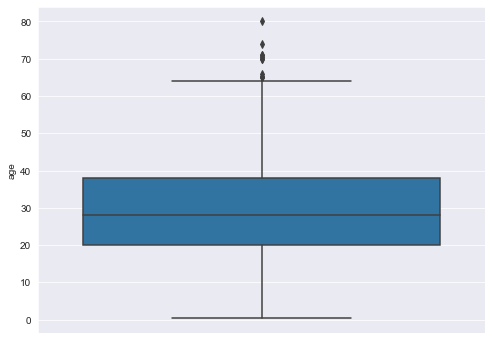

In [3]:
# Visualizing the outliers using a box plot on the age column

sns.boxplot(y="age",data=titanic_data)

In [4]:
#Finding the lower and upper limits for the outliers for the age column


IQR = titanic_data["age"].quantile(0.75) - titanic_data["age"].quantile(0.25)

lower_age_limit = titanic_data["age"].quantile(0.25) - (IQR * 1.5)

upper_age_limit = titanic_data["age"].quantile(0.75) + (IQR * 1.5)


print(lower_age_limit)
print(upper_age_limit)

-6.6875
64.8125


In [5]:
# Finding the rows where age is larger than 64.81 and smaller than -6.68

age_outliers = np.where(titanic_data["age"] > upper_age_limit,True,np.where(titanic_data["age"] < lower_age_limit,True,False))

In [6]:
#Removing the rows that containing the outlier values


titanic_without_age_outliers = titanic_data.loc[~(age_outliers),]

titanic_data.shape,titanic_without_age_outliers.shape

((891, 15), (880, 15))

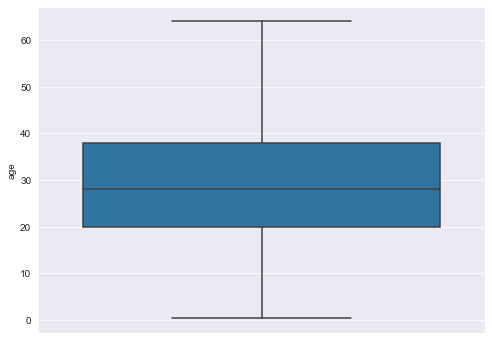

In [7]:
# Using a box plot to show that the outliers have been removed

sns.boxplot(y="age",data=titanic_without_age_outliers)

# Outlier Capping Using IQR

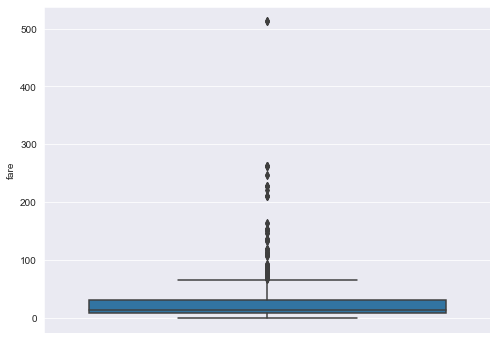

In [8]:
# Plotting a box plot for the fare column of the titanic dataset

sns.boxplot(y="fare",data=titanic_data)

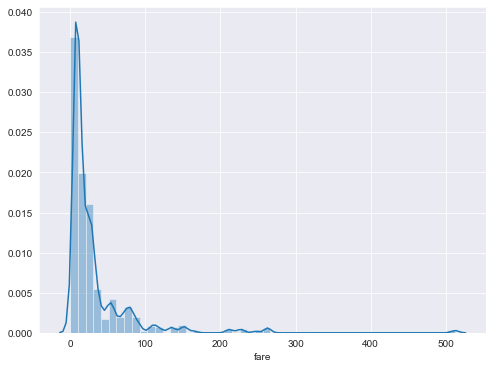

In [10]:
#The fare column has very high variance due to the presence of a large number of outliers
# Plotting a distribution of data in the fare column

sns.distplot(titanic_data["fare"])

In [11]:
#Using the IQR method to find the upper and lower limits of outliers in the fare column


IQR = titanic_data["fare"].quantile(0.75) - titanic_data["fare"].quantile(0.25)

lower_fare_limit = titanic_data["fare"].quantile(0.25) - (IQR * 1.5)

upper_fare_limit = titanic_data["fare"].quantile(0.75) + (IQR * 1.5)


print(lower_fare_limit)
print(upper_fare_limit)

-26.724
65.6344


In [12]:
# Replacing the outlier values with the upper and lower limit values

titanic_data["fare"] = np.where(titanic_data["fare"] > upper_fare_limit,upper_fare_limit,np.where(titanic_data["fare"]<lower_fare_limit,lower_fare_limit,titanic_data["fare"]))

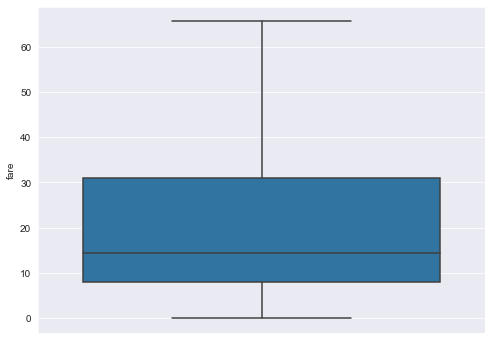

In [13]:
sns.boxplot(y="fare",data=titanic_data)

In [14]:
#The plot shows that the outliers have been removed

# Outlier Capping Using Mean and Std

In [15]:
titanic_data = sns.load_dataset("titanic")

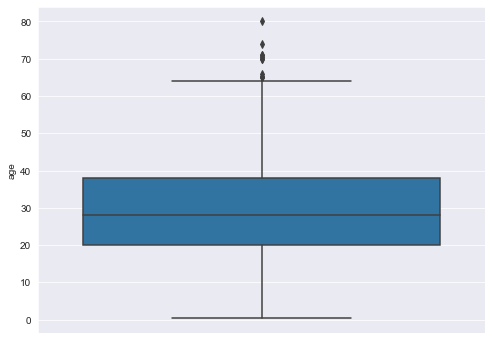

In [16]:
# Box plot showing age outliers

sns.boxplot(y="age",data=titanic_data)

In [18]:
# Finding the upper and lower Thresholds for the age column of the titanic dataset using mean and standard deviation capping

lower_age_limit = titanic_data["age"].mean() - (3 * titanic_data["age"].std())
upper_age_limit = titanic_data["age"].mean() + (3 * titanic_data["age"].std())


print(lower_age_limit)
print(upper_age_limit)

-13.88037434994331
73.27860964406095


In [19]:
# Replacing the outlier values by the upper and lower limits

titanic_data["age"] = np.where(titanic_data["age"] > upper_age_limit,upper_age_limit,np.where(titanic_data["age"]<lower_age_limit,lower_age_limit,titanic_data["age"]))

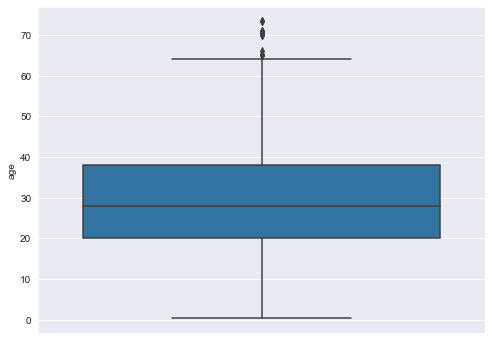

In [20]:
#Box plot shows that we still have some outliers after applying the mean and standard deviation on the age column

sns.boxplot(y="age",data=titanic_data)

# Outlier Capping Using Quantiles

In [21]:
titanic_data = sns.load_dataset("titanic")

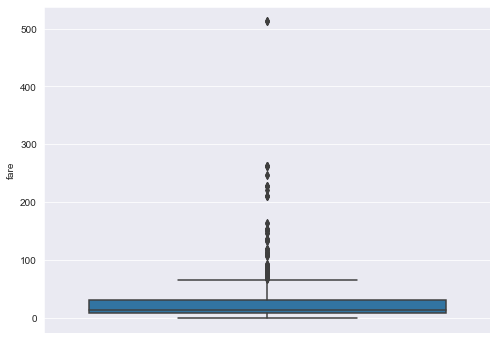

In [22]:
# Boxplot showing the fare column outliers

sns.boxplot(y="fare",data=titanic_data)

In [23]:
#Setting 0.05 as the lower limit and 0.95 as the upper limit for the quantiles to find the outliers

lower_fare_limit = titanic_data["fare"].quantile(0.05)
upper_fare_limit = titanic_data["fare"].quantile(0.95)

print(lower_fare_limit)
print(upper_fare_limit)

7.225
112.07915


In [24]:
# The output shows that anything beyond 112.07 is an outlier and anything below 7.22 is also an outlier

titanic_data["fare"] = np.where(titanic_data["fare"]>upper_fare_limit,upper_fare_limit,np.where(titanic_data["fare"]<lower_fare_limit,lower_fare_limit,titanic_data["fare"]))

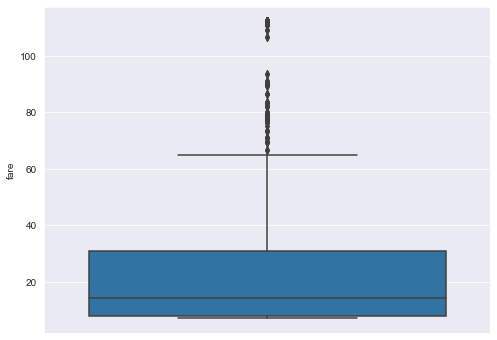

In [25]:
# Showing a box plot for the fare column of the titanic dataset after removing the outliers using the quantile method

sns.boxplot(y="fare",data=titanic_data)

In [26]:
#The output shows that the quantile method is not very good at finding the outliers. Or we may need to increase the threshold 
#for the quantile values to filter more outliers

# Outlier Capping using Custom Values

In [27]:
#Loading the titanic dataset and finding the max and min values of the age column

titanic_data = sns.load_dataset("titanic")

print(titanic_data.age.max())
print(titanic_data.age.min())

80.0
0.42


In [28]:
#Replacing all the values greater than 50 in the age column of the titanic dataset by 50 and values less than 10 by 10

titanic_data["age"] = np.where(titanic_data["age"] > 50,50,np.where(titanic_data["age"]<10,10,titanic_data["age"]))

In [29]:
#Printing the min and max values for the age column

print(titanic_data["age"].min())
print(titanic_data["age"].max())

10.0
50.0


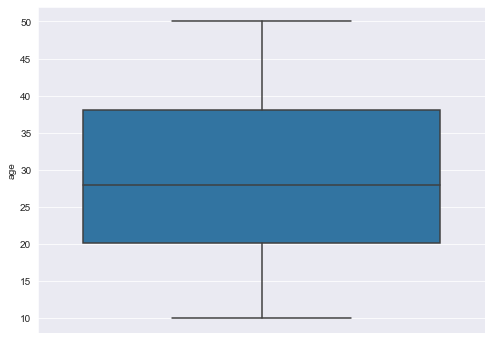

In [30]:
#Displaying the box plot for the age column 


sns.boxplot(y="age",data=titanic_data)

In [ ]:
#The outliers have been removed. However, custom capping is not the right approach and should not be used unless necessary as it 
# can distort the shape of the dataset
